In [35]:
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

#from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import PredictionErrorDisplay

from sklearn.decomposition import PCA

#from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import datetime
import seaborn as sns
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.mosaicplot import mosaic
pd.set_option('display.max_columns', 250)

**downloard the data**

In [36]:
#df_geo = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_geo_spb_transport_fitnes_yandex_cian_metro_population_final_version.csv')
df_geo = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_geo_spb_transport_fitnes_yandex_cian_metro_population_final_version_neighbors.csv')
df_time = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_time_based_features_full.csv')
df_hex_unique = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_hex_unique_with_shares_spb.csv')
df_hex_total = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_hex_total_with_shares_spb.csv')

In [37]:
df_geo.shape, df_time.shape, df_hex_unique.shape, df_hex_total.shape

((3892, 97), (3892, 63), (3892, 68), (3892, 68))

**Drop part of hexagons with total visits lees or equal 150 or unique_visits less or equal 50**

In [38]:
df_hex_total_and_unique = pd.merge(df_hex_unique, df_hex_total,
                                how='left', left_on='h3_9', right_on='h3_9')

In [39]:
avaible_hexes = df_hex_total_and_unique[(df_hex_total_and_unique['unique_visits'] > 50)].h3_9.to_list()
len(avaible_hexes)

1223

In [40]:
avaible_hexes = df_hex_total_and_unique[(df_hex_total_and_unique['total_visits'] > 150)
                                       |(df_hex_total_and_unique['unique_visits'] > 50)].h3_9.to_list()
len(avaible_hexes)

1335

In [41]:
df_hex_total = df_hex_total[df_hex_total['h3_9'].isin(avaible_hexes)]
df_hex_unique = df_hex_unique[df_hex_unique['h3_9'].isin(avaible_hexes)]
df_time = df_time[df_time['h3_9'].isin(avaible_hexes)]
df_geo = df_geo[df_geo['h3_9'].isin(avaible_hexes)]

df_geo.shape, df_time.shape, df_hex_unique.shape, df_hex_total.shape

((1335, 97), (1335, 63), (1335, 68), (1335, 68))

**check for diploma presentation**

In [42]:
df_hex_unique.carsharing_user_unique_share.mean()

0.19161748200729928

In [43]:
df_hex_unique.age_40_60_unique_share.mean()

0.4302492342807412

In [44]:
df_time.evening_share.mean()

0.2124638305540228

**continue**

In [45]:
df_geo = pd.get_dummies(df_geo, columns = ['name'])

In [46]:
adj_col_names = []
for name in df_geo.columns:
    adj_col_names.append(name.replace('name_',''))

df_geo.columns = adj_col_names

In [47]:
df_geo.shape

(1335, 110)

In [48]:
rename_dict_geo = {
    'Адмиралтейский район': 'admiralteysky_district',
    'Василеостровский район': 'vasileostrovsky_district',
    'Выборгский район': 'vyborgsky_district',
    'Калининский район': 'kalininsky_district',
    'Кировский район': 'kirovsky_district',
    'Красногвардейский район': 'krasnogvardeysky_district',
    'Красносельский район': 'krasnoselsky_district',
    'Московский район': 'moskovsky_district',
    'Невский район': 'nevsky_district',
    'Петроградский район': 'petrogradsky_district',
    'Приморский район': 'primorsky_district',
    'Пушкинский район': 'pushkinsky_district',
    'Фрунзенский район': 'frunzensky_district',
    'Центральный район': 'tsentralny_district'
}

# Rename columns using the dictionary
df_geo.rename(columns=rename_dict_geo, inplace=True)

In [49]:
df_yandex_unq_atr = pd.read_csv('C:/Users/elysi/Tele2_project/data/pre_model_state/df_yandex_unq_atr.csv')

In [50]:
df_geo = pd.merge(df_geo, df_yandex_unq_atr,
                                how='left', left_on='h3_9', right_on='h3_9')

In [51]:
df_geo.head(3)

,h3_9,cian_total_listing_count_including_hex_3hn,cian_total_area_including_hex_3hn,cian_median_area_including_hex_3hn,cian_avg_area_including_hex_3hn,cian_median_price_per_m2_including_hex_3hn,cian_avg_price_per_m2_including_hex_3hn,spb_trans_amount_unqiue_vehicles,spb_trans_unique_vehicle_stops,spb_trans_unique_stops,spb_trans_bus_stop_counter,spb_trans_tram_stop_counter,spb_trans_trolleybus_stop_counter,total_fit_clubs,total_fit_clubs_neighbour_2_hn,metro_count,total_metro_neighbour_5_hn,population_sum,total_population_neighbour_2_hn,category_auto_count_2_hn,category_security_count_2_hn,category_business_count_2_hn,category_government_count_2_hn,category_pets_count_2_hn,category_home_and_interior_count_2_hn,category_food_and_drinks_count_2_hn,category_computers_and_internet_count_2_hn,category_beauty_and_health_count_2_hn,category_culture_and_art_count_2_hn,category_stores_count_2_hn,category_medicine_and_pharmacy_count_2_hn,category_hospitals_count_2_hn,category_science_and_education_count_2_hn,category_kindergartens_count_2_hn,category_universities_count_2_hn,category_real_estate_count_2_hn,category_business_centers_count_2_hn,category_dormitories_count_2_hn,category_society_count_2_hn,category_clothing_and_fashion_count_2_hn,category_recreation_and_entertainment_count_2_hn,category_zoos_count_2_hn,category_entertainment_centers_count_2_hn,category_production_and_supplies_count_2_hn,category_advertising_and_printing_count_2_hn,category_reference_information_systems_count_2_hn,category_mass_media_count_2_hn,category_construction_and_repair_count_2_hn,category_telecommunications_and_communication_count_2_hn,category_goods_for_children_count_2_hn,category_transport_and_transportation_count_2_hn,category_railway_stations_count_2_hn,category_bus_stations_count_2_hn,category_airports_count_2_hn,category_hotels_count_2_hn,category_tourism_count_2_hn,category_services_count_2_hn,category_finance_count_2_hn,category_parking_lots_and_garages_count_2_hn,category_free_parking_count_2_hn,category_parking_count_2_hn,category_paid_parking_count_2_hn,category_underground_parking_count_2_hn,category_polyclinics_count_2_hn,category_gymnasiums_count_2_hn,category_colleges_count_2_hn,category_lyceums_count_2_hn,category_general_education_schools_count_2_hn,category_planetariums_count_2_hn,category_amusement_parks_count_2_hn,category_industrial_enterprises_count_2_hn,subcategory_hospitals_count_2_hn,subcategory_kindergartens_count_2_hn,subcategory_universities_count_2_hn,subcategory_business_centers_count_2_hn,subcategory_dormitories_count_2_hn,subcategory_zoos_count_2_hn,subcategory_dolphinariums_and_aquariums_count_2_hn,subcategory_entertainment_centers_count_2_hn,subcategory_railway_stations_count_2_hn,subcategory_bus_stations_count_2_hn,subcategory_airports_count_2_hn,subcategory_hotels_count_2_hn,subcategory_parking_lots_and_garages_count_2_hn,subcategory_free_parking_count_2_hn,subcategory_parking_count_2_hn,subcategory_paid_parking_count_2_hn,subcategory_underground_parking_count_2_hn,subcategory_polyclinics_count_2_hn,subcategory_gymnasiums_count_2_hn,subcategory_colleges_count_2_hn,subcategory_lyceums_count_2_hn,subcategory_general_education_schools_count_2_hn,subcategory_planetariums_count_2_hn,subcategory_amusement_parks_count_2_hn,subcategory_industrial_enterprises_count_2_hn,admiralteysky_district,vasileostrovsky_district,vyborgsky_district,kalininsky_district,kirovsky_district,krasnogvardeysky_district,krasnoselsky_district,moskovsky_district,nevsky_district,petrogradsky_district,primorsky_district,pushkinsky_district,frunzensky_district,tsentralny_district,total_subcategory_cinemas_neighbour_4_hn_binary,total_subcategory_shopping_centers_neighbour_4_hn_binary,total_subcategory_museums_neighbour_4_hn_binary,total_subcategory_parks_of_culture_and_leisure_neighbour_4_hn_binary
0,8911060006bffff,8.0,12062.9,1263.33,1287.046,1000.0,937.210,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,15.0,11.0,2.0,11.0,17.0,43.0,8.0,0.0,1.0,

In [34]:
df_geo.category_reference_information_systems_count_2_hn.sum()

6105.0

**drop income related variable (unique visits) from df_hex_total before join, to avoid data leak**

In [52]:
df_geo = df_geo.drop(columns=['category_society_count_2_hn', 'category_beauty_and_health_count_2_hn', 'category_reference_information_systems_count_2_hn'])

In [53]:
df_model_short = pd.merge(df_hex_unique, df_time,
                                how='left', left_on='h3_9', right_on='h3_9')

In [54]:
df_model_short = pd.merge(df_model_short, df_geo,
                                how='left', left_on='h3_9', right_on='h3_9')

**drop income related variable from df_hex_total before join, to avoid data leak**

In [55]:
# df_hex_total = df_hex_total.drop(columns=['salary_1_total','salary_2_total',
#                                          'salary_3_total', 'salary_4_total', 'salary_5_total',
                                        
#                                          'salary_1_total_share', 'salary_2_total_share',
#                                          'salary_3_total_share', 'salary_4_total_share', 'salary_5_total_share'])

In [56]:
df_model_short = pd.merge(df_model_short, df_hex_total,
                                how='left', left_on='h3_9', right_on='h3_9')

In [57]:
df_model_short.shape

(1335, 307)

In [58]:
df_model_short = df_model_short.set_index('h3_9')

In [59]:
df_model_short = df_model_short.replace(np.nan, 0)

In [60]:
df_model_short.head(3)

,unique_visits,car_owners_unique,carsharing_user_unique,not_citizen_rf_unique,healthy_food_inter_unique,public_trnsprt_user_unique,pharmacies_inter_unique,beauty_salon_inter_unique,elite_sports_inter_unique,sprtswr_ftwr_inter_unique,sprt_good_inter_unique,trvl_rus_unique,trvl_abrd_unique,sprt_fit_inter_unique,hunting_fishing_inter_unique,fashion_inter_unique,coffee_inter_unique,med_serv_inter_unique,education_inter_unique,delivery_inter_unique,markets_inter_unique,no_children_unique,age_20_unique,age_20_30_unique,age_30_40_unique,age_40_60_unique,age_60_unique,male_unique,female_unique,salary_1_unique,salary_2_unique,salary_3_unique,salary_4_unique,salary_5_unique,car_owners_unique_share,carsharing_user_unique_share,not_citizen_rf_unique_share,healthy_food_inter_unique_share,public_trnsprt_user_unique_share,pharmacies_inter_unique_share,beauty_salon_inter_unique_share,elite_sports_inter_unique_share,sprtswr_ftwr_inter_unique_share,sprt_good_inter_unique_share,trvl_rus_unique_share,trvl_abrd_unique_share,sprt_fit_inter_unique_share,hunting_fishing_inter_unique_share,fashion_inter_unique_share,coffee_inter_unique_share,med_serv_inter_unique_share,education_inter_unique_share,delivery_inter_unique_share,markets_inter_unique_share,no_children_unique_share,age_20_unique_share,age_20_30_unique_share,age_30_40_unique_share,age_40_60_unique_share,age_60_unique_share,male_unique_share,female_unique_share,salary_1_unique_share,salary_2_unique_share,salary_3_unique_share,salary_4_unique_share,salary_5_unique_share,avg_duration_hrs,median_duration_hrs,weekday_visits,weekend_visits,Stay0_05h,Stay05_1h,Stay1_3h,Stay3_6h,Stay6_9h,Stay9_15h,Stay15_20h,Stay20_plus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,day,evening,morning,night,weekday_visits_share,weekend_visits_share,Stay0_05h_share,Stay05_1h_share,Stay1_3h_share,Stay3_6h_share,Stay6_9h_share,Stay9_15h_share,Stay15_20h_share,Stay20_plus_share,Friday_share,Monday_share,Saturday_share,Sunday_share,Thursday_share,Tuesday_share,Wednesday_share,day_share,evening_share,morning_share,night_share,avg_duration_hrs_per_unique,median_duration_hrs_per_unique,Stay0_05h_per_unique,Stay05_1h_per_unique,Stay1_3h_per_unique,Stay3_6h_per_unique,Stay6_9h_per_unique,Stay9_15h_per_unique,Stay15_20h_per_unique,Stay20_plus_per_unique,Stay0_05h_per_unique_share_per_unique,Stay05_1h_per_unique_share_per_unique,Stay1_3h_per_unique_share_per_unique,Stay3_6h_per_unique_share_per_unique,...,category_services_count_2_hn,category_finance_count_2_hn,category_parking_lots_and_garages_count_2_hn,category_free_parking_count_2_hn,category_parking_count_2_hn,category_paid_parking_count_2_hn,category_underground_parking_count_2_hn,category_polyclinics_count_2_hn,category_gymnasiums_count_2_hn,category_colleges_count_2_hn,category_lyceums_count_2_hn,category_general_education_schools_count_2_hn,category_planetariums_count_2_hn,category_amusement_parks_count_2_hn,category_industrial_enterprises_count_2_hn,subcategory_hospitals_count_2_hn,subcategory_kindergartens_count_2_hn,subcategory_universities_count_2_hn,subcategory_business_centers_count_2_hn,subcategory_dormitories_count_2_hn,subcategory_zoos_count_2_hn,subcategory_dolphinariums_and_aquariums_count_2_hn,subcategory_entertainment_centers_count_2_hn,subcategory_railway_stations_count_2_hn,subcategory_bus_stations_count_2_hn,subcategory_airports_count_2_hn,subcategory_hotels_count_2_hn,subcategory_parking_lots_and_garages_count_2_hn,subcategory_free_parking_count_2_hn,subcategory_parking_count_2_hn,subcategory_paid_parking_count_2_hn,subcategory_underground_parking_count_2_hn,subcategory_polyclinics_count_2_hn,subcategory_gymnasiums_count_2_hn,subcategory_colleges_count_2_hn,subcategory_lyceums_count_2_hn,subcategory_general_education_schools_count_2_hn,subcategory_planetariums_count_2_hn,subcategory_amusement_parks_count_2_hn,subcategory_industrial_enterprises_count_2_hn,admiralteysky_district,vasileostrovsky_district,vyborgsky_district,kalininsky_district,k

In [61]:
df_model_short.salary_5_unique_share.median()

0.1602209944751381

In [62]:
df_model_short.salary_5_unique_share.mean()

0.1653347725274982

## Model itself

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import shap

In [64]:
df_model_short.filter(regex = 'fit').columns

Index(['sprt_fit_inter_unique', 'sprt_fit_inter_unique_share',
       'total_fit_clubs', 'total_fit_clubs_neighbour_2_hn',
       'sprt_fit_inter_total', 'sprt_fit_inter_total_share'],
      dtype='object')

Target: total_fit_clubs
Best Model: GradientBoostingRegressor
Metrics: {'R2': 0.03962664382926284, 'MAE': 0.40227233493431896, 'MAPE': inf}


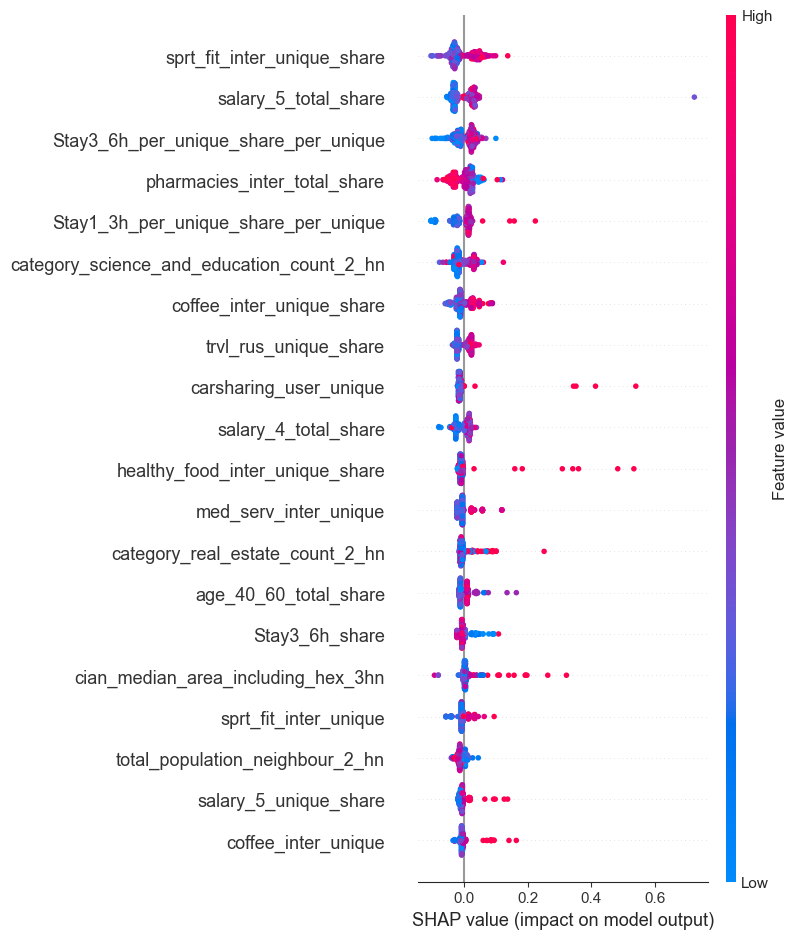

Target: total_fit_clubs_neighbour_2_hn
Best Model: GradientBoostingRegressor
Metrics: {'R2': 0.7072710577660759, 'MAE': 1.3718505642571408, 'MAPE': inf}


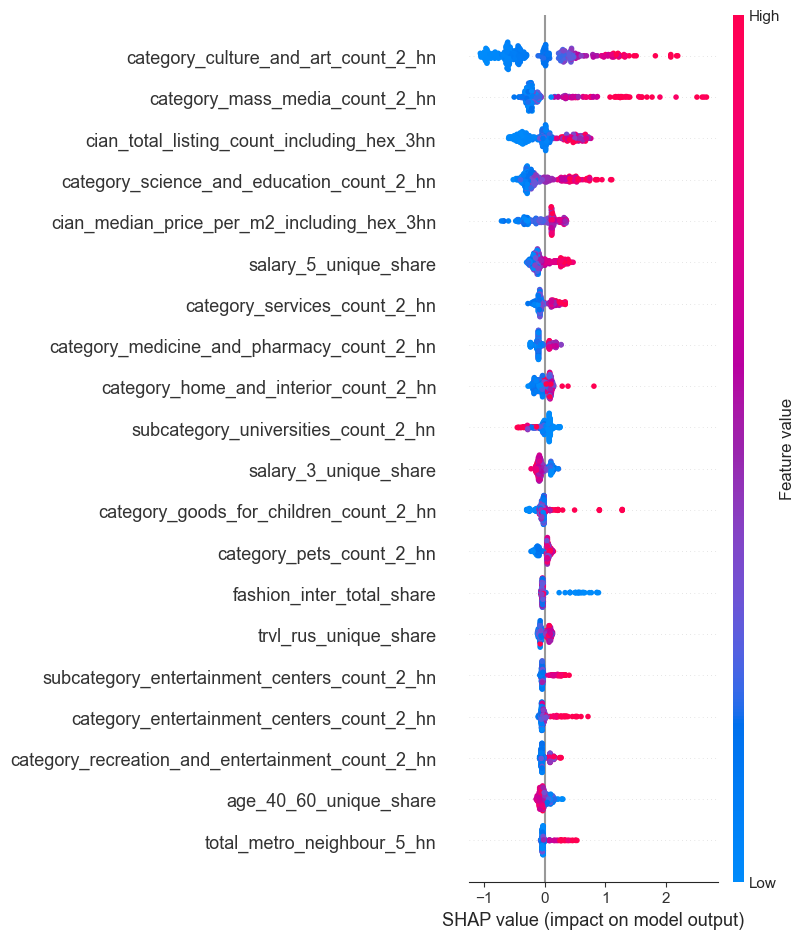

In [65]:
target_columns = ['total_fit_clubs', 'total_fit_clubs_neighbour_2_hn']

# Standardize the dataframe except the target columns
X = df_model_short.drop(target_columns, axis=1)
y = df_model_short[target_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model building and evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

for target in target_columns:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y[target], test_size=0.25, random_state=42)
    
    best_score = -float('inf')
    best_model = None
    best_metrics = {}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        if r2 > best_score:
            best_score = r2
            best_model = model
            best_metrics = {"R2": r2, "MAE": mae, "MAPE": mape}

    # Output the best model and its metrics for the current target
    print(f"Target: {target}")
    print(f"Best Model: {type(best_model).__name__}")
    print(f"Metrics: {best_metrics}")
    
    # Model interpretation using SHAP
    try:
        explainer = shap.Explainer(best_model, X_train)
        shap_values = explainer(X_test, check_additivity=False)  # Corrected placement of check_additivity
        # Plot SHAP values
        shap.summary_plot(shap_values, X_test, feature_names=X.columns)
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating SHAP values for {target}: {str(e)}")